In [7]:
import operator
import datetime
import pytz
from pytz import timezone

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif',palette = 'Set1',style ='darkgrid' )

#context:{paper, notebook, talk, poster}
#style:darkgrid, whitegrid, dark, white, ticks

D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\software\Python\Anaconda_Install\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\software\Python\Anaconda_Install\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\software\Python\Anaconda_Install\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\software\Python\Anaconda_Install\lib\site-packages\ipykernel\kernelapp.py", l

In [8]:
tips = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\tips.csv',encoding = 'latin-1')

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


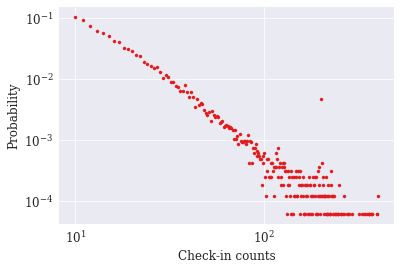

In [9]:
tip_count = tips.uid.value_counts()
tip_count = pd.DataFrame(tip_count[tip_count > 9]).uid.value_counts().sort_index(ascending = False)
probability = tip_count / tip_count.sum()
#cusum_pro = probability.cumsum().sort_index()

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(probability.index, probability.values,marker = 'o' ,s = 10)
plt.xlabel('Check-in counts',fontsize=12)
plt.ylabel('Probability',fontsize=12)
#plt.title('Distribution of User chech-ins ',fontsize = 14)
#plt.xticks([0,10,100,1000])
plt.show()

In [10]:
nyc_home = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\NYC_home.csv',encoding = 'latin-1')
nyc_out = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\NYC_out.csv',encoding = 'latin-1')
la_home = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\LA_home.csv',encoding = 'latin-1')
la_out = pd.read_csv(r'D:\software\Github\Recommender-System\RS-LBSN\dataset\F\LA_out.csv',encoding = 'latin-1')
nyc = pd.concat([nyc_home,nyc_out],axis = 0)
la = pd.concat([la_home,la_out],axis = 0)

D:\software\Python\Anaconda_Install\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
nyc_tips = nyc.loc[nyc.city_v == 'New York']
la_tips =  la.loc[la.city_v == 'Los Angeles']

nyc_home_tips = nyc_tips.loc[nyc_tips.city_u == 'New York']
nyc_out_tips = nyc_tips.loc[nyc_tips.city_u != 'New York']

la_home_tips = la_tips.loc[la_tips.city_u == 'Los Angeles']
la_out_tips = la_tips.loc[la_tips.city_u != 'Los Angeles']

In [12]:

def hourmap(x, eastern):
    utc_dt = pytz.utc.localize(datetime.datetime.utcfromtimestamp(x))
    date = utc_dt.astimezone(eastern)
    tup = date.timetuple()
    '''
    h = tup.tm_hour
    m = tup.tm_min
    if h < 23:
        if m >= 30:
            h += 1
    if h == 23:
        if m >= 30:
            h = 0
    return h
    '''
    return tup.tm_hour


def prob(data, zone):
    hour_count = data.time.dropna().astype(int).map(lambda x: hourmap(x, zone))
    counts = hour_count.value_counts().sort_index()
    s = sum(counts.values)
    pro = counts / s
    return pro

In [13]:
eastern = timezone('US/Eastern')
pacific = timezone('US/Pacific')

nyc_pro = prob(nyc_tips,eastern)
la_pro = prob(la_tips, pacific)

nyc_home_pro = prob(nyc_home_tips,eastern)
nyc_out_pro = prob(nyc_out_tips,eastern)

la_home_pro = prob(la_home_tips,pacific)
la_out_pro = prob(la_out_tips,pacific)

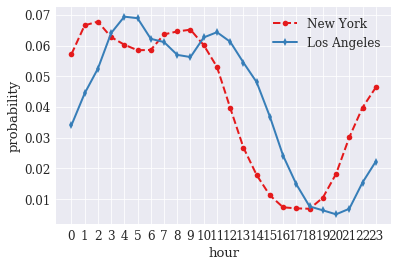

In [8]:
def hourmap(x):
    date = datetime.datetime.fromtimestamp(x)
    tup = date.timetuple()
    return tup.tm_hour
    
def prob(data):
    hour_count = data.time.dropna().astype(int).map(lambda x: hourmap(x))
    counts = hour_count.value_counts().sort_index()
    s = sum(counts.values)
    pro = counts / s
    return pro


nyc_pro = prob(nyc_tips)
la_pro = prob(la_tips)

nyc_home_pro = prob(nyc_home_tips)
nyc_out_pro = prob(nyc_out_tips)

la_home_pro = prob(la_home_tips)
la_out_pro = prob(la_out_tips)

fig, ax = plt.subplots()
ax.plot(nyc_pro.index, nyc_pro.values,'--',marker = 'o',label = 'New York')
ax.plot(la_pro.index, la_pro.values, '-', marker = 'd', label = 'Los Angeles')
ax.set_xticks(range(24))
ax.set_xlabel('hour')
ax.set_ylabel('probability')
plt.legend()
plt.show()

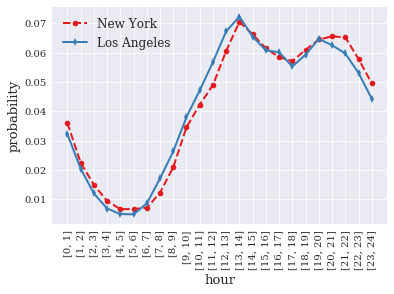

In [21]:
fig, ax = plt.subplots()
ax.plot(nyc_pro.index, nyc_pro.values,'--',marker = 'o',label = 'New York')
ax.plot(la_pro.index, la_pro.values, '-', marker = 'd', label = 'Los Angeles')
ax.set_xticks(range(24))
ax.set_xlabel('hour')
ax.set_ylabel('probability')
xticks = range(24)
plt.xticks(xticks, map(lambda x: str([x, x+1]), xticks),rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend()
plt.show()

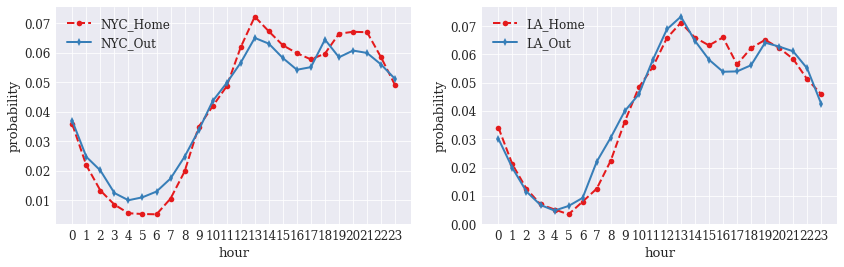

In [15]:
fig, axs = plt.subplots(1,2,figsize = (14,4))
axs[0].plot(nyc_home_pro.index, nyc_home_pro.values,'--',marker = 'o',label = 'NYC_Home')
axs[0].plot(nyc_out_pro.index, nyc_out_pro.values, '-', marker = 'd', label = 'NYC_Out')
axs[0].set_xticks(range(24))
axs[0].set_xlabel('hour')
axs[0].set_ylabel('probability')
axs[0].legend()

axs[1].plot(la_home_pro.index, la_home_pro.values,'--',marker = 'o',label = 'LA_Home')
axs[1].plot(la_out_pro.index, la_out_pro.values, '-', marker = 'd',label = 'LA_Out')
axs[1].set_xticks(range(24))
axs[1].set_xlabel('hour')
axs[1].set_ylabel('probability')
axs[1].legend()
plt.show()

In [33]:
t = nyc.time.dropna().astype(int)
for timeStamp in t[0:30]:
    dateArray = datetime.datetime.utcfromtimestamp(timeStamp)
    time = dateArray.strftime("%Y-%m-%d %H:%M:%S")
    print(timeStamp)
    print(time)

1210024047
2008-05-05 21:47:27
1228722604
2008-12-08 07:50:04
1228814087
2008-12-09 09:14:47
1232639904
2009-01-22 15:58:24
1233830744
2009-02-05 10:45:44
1234182915
2009-02-09 12:35:15
1234611589
2009-02-14 11:39:49
1234632263
2009-02-14 17:24:23
1236934552
2009-03-13 08:55:52
1236935141
2009-03-13 09:05:41
1236935263
2009-03-13 09:07:43
1236935460
2009-03-13 09:11:00
1236935658
2009-03-13 09:14:18
1249526704
2009-08-06 02:45:04
1250454234
2009-08-16 20:23:54
1251343849
2009-08-27 03:30:49
1251521620
2009-08-29 04:53:40
1252443795
2009-09-08 21:03:15
1253473364
2009-09-20 19:02:44
1253473491
2009-09-20 19:04:51
1253477780
2009-09-20 20:16:20
1253931780
2009-09-26 02:23:00
1254013283
2009-09-27 01:01:23
1254765871
2009-10-05 18:04:31
1255819955
2009-10-17 22:52:35
1256426575
2009-10-24 23:22:55
1257477059
2009-11-06 03:10:59
1257785555
2009-11-09 16:52:35
1258329844
2009-11-16 00:04:04
1258329941
2009-11-16 00:05:41


In [34]:
t = nyc.time.dropna().astype(int)
eastern = timezone('US/Eastern')
for timeStamp in t[0:30]:
    utc_dt = pytz.utc.localize(datetime.datetime.utcfromtimestamp(timeStamp))
    au_dt = utc_dt.astimezone(eastern)
    time = au_dt.strftime("%Y-%m-%d %H:%M:%S")
    print(time)

2008-05-05 17:47:27
2008-12-08 02:50:04
2008-12-09 04:14:47
2009-01-22 10:58:24
2009-02-05 05:45:44
2009-02-09 07:35:15
2009-02-14 06:39:49
2009-02-14 12:24:23
2009-03-13 04:55:52
2009-03-13 05:05:41
2009-03-13 05:07:43
2009-03-13 05:11:00
2009-03-13 05:14:18
2009-08-05 22:45:04
2009-08-16 16:23:54
2009-08-26 23:30:49
2009-08-29 00:53:40
2009-09-08 17:03:15
2009-09-20 15:02:44
2009-09-20 15:04:51
2009-09-20 16:16:20
2009-09-25 22:23:00
2009-09-26 21:01:23
2009-10-05 14:04:31
2009-10-17 18:52:35
2009-10-24 19:22:55
2009-11-05 22:10:59
2009-11-09 11:52:35
2009-11-15 19:04:04
2009-11-15 19:05:41


In [35]:
t = nyc.time.dropna().astype(int)
eastern = timezone('America/New_York')
for timeStamp in t[0:30]:
    utc_dt = pytz.utc.localize(datetime.datetime.utcfromtimestamp(timeStamp))
    au_dt = utc_dt.astimezone(eastern)
    time = au_dt.strftime("%Y-%m-%d %H:%M:%S")
    print(time)

2008-05-05 17:47:27
2008-12-08 02:50:04
2008-12-09 04:14:47
2009-01-22 10:58:24
2009-02-05 05:45:44
2009-02-09 07:35:15
2009-02-14 06:39:49
2009-02-14 12:24:23
2009-03-13 04:55:52
2009-03-13 05:05:41
2009-03-13 05:07:43
2009-03-13 05:11:00
2009-03-13 05:14:18
2009-08-05 22:45:04
2009-08-16 16:23:54
2009-08-26 23:30:49
2009-08-29 00:53:40
2009-09-08 17:03:15
2009-09-20 15:02:44
2009-09-20 15:04:51
2009-09-20 16:16:20
2009-09-25 22:23:00
2009-09-26 21:01:23
2009-10-05 14:04:31
2009-10-17 18:52:35
2009-10-24 19:22:55
2009-11-05 22:10:59
2009-11-09 11:52:35
2009-11-15 19:04:04
2009-11-15 19:05:41


In [ ]:
eastern = timezone('US/Eastern')
>>> utc_dt = utc.localize(datetime.utcfromtimestamp(1143408899))
>>> utc_dt.strftime(fmt)
'2006-03-26 21:34:59 UTC+0000'
>>> au_tz = timezone('Australia/Sydney')
>>> au_dt = utc_dt.astimezone(au_tz)
>>> au_dt.strftime(fmt)
'2006-03-27 08:34:59 AEDT+1100'
>>> utc_dt2 = au_dt.astimezone(utc)
>>> utc_dt2.strftime(fmt)
'2006-03-26 21:34:59 UTC+0000'
>>> utc_dt == utc_dt2
True